# Star Wars: Fan Analysis

In this analysis I will be analyzing a dataset that contains the information from a survey about star wars. The full dataset can be found on kaggle [here](https://www.kaggle.com/datasets/samaxtech/star-wars-survey-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Now we are going to clean up the dataset a bit. First we will change 'Have you seen any of the 6 films in the Star Wars franchise?' to boolean values. We will also do this to the columns that refer to each movie, and we will change the column names for better readability.

In [5]:
# Change the columns of 'Have you seen any of the 6
# films in the Star Wars franchise' and 
# 'Do you consider yourself to be a fan of the Star Wars
# film franchise?' to boolean type
yes_no = {
    "Yes": True,
    "No" : False
}

cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?']

for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)

In [6]:
# Replace values to be boolean
seen_or_no = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen_or_no)

In [7]:
# Rename the columns to make sense
new_names = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
            'Unnamed: 4': 'seen_2',
            'Unnamed: 5': 'seen_3',
            'Unnamed: 6': 'seen_4',
            'Unnamed: 7': 'seen_5',
            'Unnamed: 8': 'seen_6'}

star_wars = star_wars.rename(columns=new_names)

In [8]:
# Check the dataset
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now we will clean the columns asking about preference. We will change the values to a float and rename the columns.

In [9]:
# For easy reference when cleaning the following columns
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [10]:
# Convert all the columns to float
star_wars[star_wars.columns[9:15]] =(
star_wars[star_wars.columns[9:15]].astype(float)
)

In [11]:
# Change the names of the ranking columns
ranking_names = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                'Unnamed: 10': 'ranking_2',
                'Unnamed: 11': 'ranking_3',
                'Unnamed: 12': 'ranking_4',
                'Unnamed: 13': 'ranking_5',
                'Unnamed: 14': 'ranking_6'}

star_wars = star_wars.rename(columns=ranking_names)

In [12]:
# Find the average ranking of each movie
rankings = star_wars.iloc[:,9:15].mean()

<Axes: >

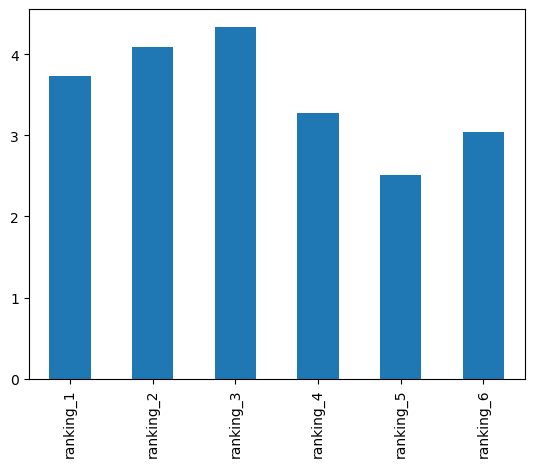

In [13]:
# Plot the rankings vs each other
rankings.plot.bar()

From this we can see that movie 5 ranks the lowest (in this case that is a good thing) more often, while movie 3 ranks the highest. Also, note that the original trilogy ranks better than the prequels on average.

In [14]:
# We want to know how many of the respondents
# have seen each movie
watched = star_wars.iloc[:,3:9].sum()

<Axes: >

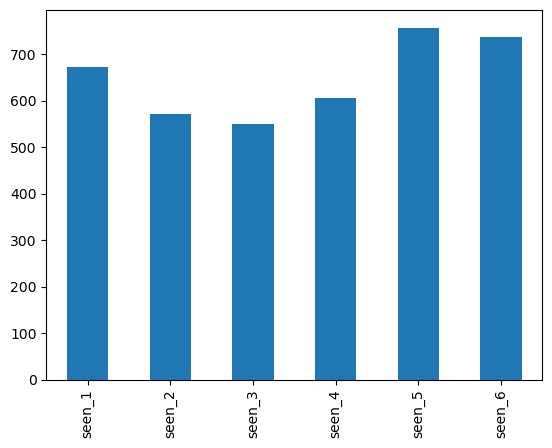

In [15]:
# Now we plot the result
watched.plot.bar()

It shows that movie 5 and 6 are the most watched movies of them all. Also movie 1 is the most watched of the prequels. Clearly the better rated movies in general are the most watched, but we see that movie 1 is actually watched quite a bit compared to its rating. This is proabably due to the fact that it was the first movie to come back. 

Now we want to do an analysis comparing male respondants to female respondants.

In [16]:
# Now we separate into males and females
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

num_males = len(males)
num_females = len(females)
print(f'{num_males} \n{num_females}')

497 
549


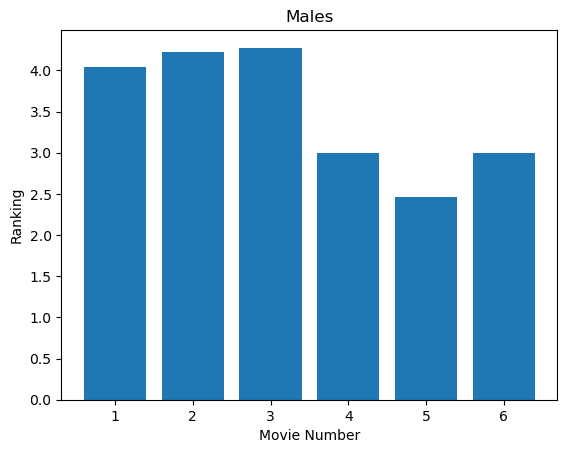

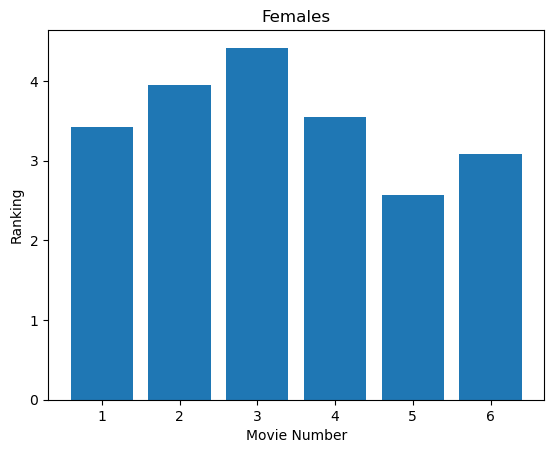

In [19]:
# We will do the same analysis as the two previous
# and report the findings
avg_males = males.iloc[:,9:15].mean()
avg_females = females.iloc[:,9:15].mean()

# Graph the results
plt.bar(range(1,7),avg_males)
plt.title('Males')
plt.xlabel('Movie Number')
plt.ylabel('Ranking')
plt.show()
plt.title('Females')
plt.bar(range(1,7), avg_females)
plt.xlabel('Movie Number')
plt.ylabel('Ranking')
plt.show()

First we note that there are more female than male respondants (although it is relatively even). From the graphs we see that males significantly favored the original trilogy over the prequels. The females, however, ranked movie 1 lower than 4, but seem to follow the other patterns. 

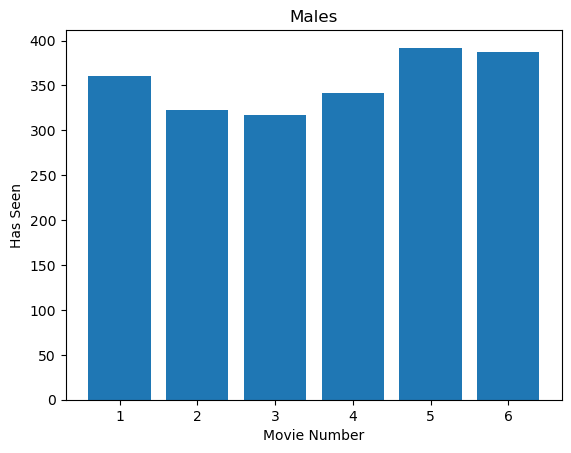

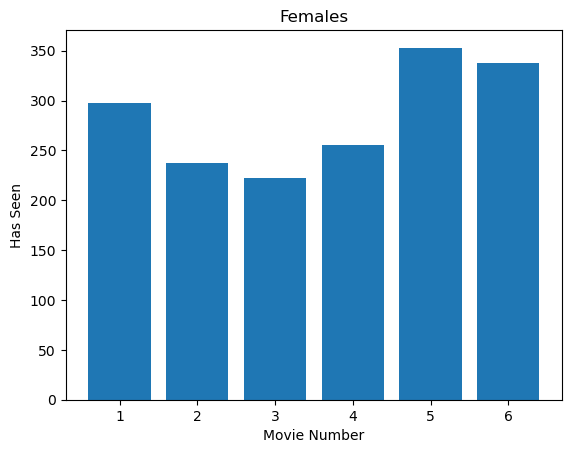

In [23]:
# We will do the same analysis as the two previous
# and report the findings
seen_males = males.iloc[:,3:9].sum()
seen_females = females.iloc[:,3:9].sum()

# Graph the results
plt.bar(range(1,7), seen_males)
plt.title('Males')
plt.xlabel('Movie Number')
plt.ylabel('Has Seen')
plt.show()
plt.bar(range(1,7), seen_females)
plt.title('Females')
plt.xlabel('Movie Number')
plt.ylabel('Has Seen')
plt.show()

We see the same pattern between the two just that more males watched all of the movies. Even though males liked the prequels less than females we see that more of them watched them. This could be due to fan loyalty. 